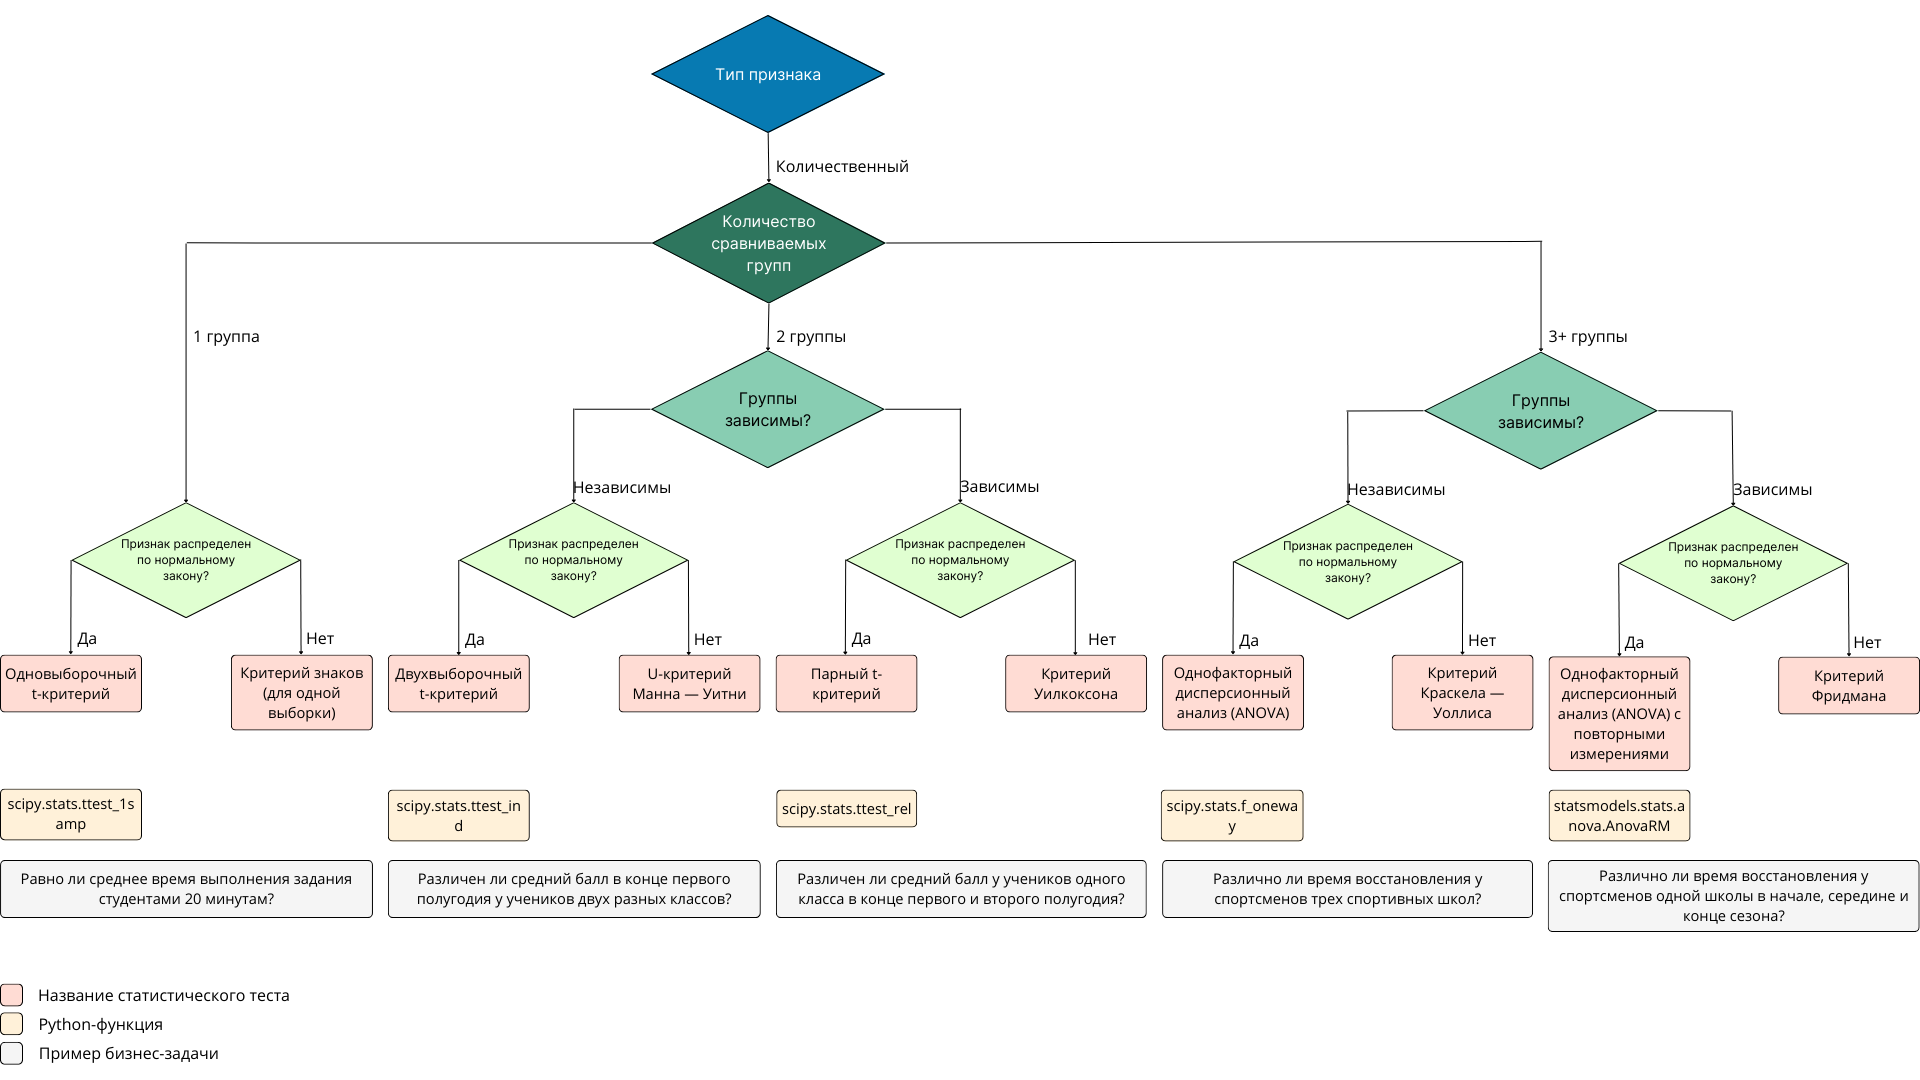

Все функции, которые реализуют параметрические тесты в библиотеках Python:

        на вход принимают:
                выборки или их параметры;
                параметры проверяемой гипотезы;
        на выход отдают:
                уровень значимости p (p-value);
                дополнительные параметры (в большинстве случаев они нам не нужны).

Предполагается, что в примерах из этого юнита все данные распределены нормально. Мы не будем проверять нормальность распределения до проведения теста в целях экономии времени и количества кода. Однако в реальных задачах, чтобы сделать выбор теста, требуется сделать проверку на нормальность.

## ОДНОВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Одновыборочный t-критерий реализован в функции [ttest_1samp()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html) в модуле stats библиотеки scipy.

Основные входные параметры:

        a — выборочные данные;
        popmean — ожидаемое среднее значение признака;
        alternative — вид альтернативной гипотезы:
                ‘two-sided’ (двусторонняя, используется по умолчанию);
                ‘less’ (левосторонняя);
                ‘greater’ (правосторонняя).

Примеры задач, когда может понадобиться использование теста:

        Необходимо проверить, что среднее время, которое пользователи проводят на сайте, больше 5 минут.
        Необходимо установить, соответствуют ли химические показатели товара заявленным на упаковке.

ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

Бизнес-задача

Компания закупает батареи для своих устройств у определённого производителя. Раньше батареи работали 40 часов. Производитель утверждает, что батареи были улучшены и теперь работают дольше.

Компания хочет проверить, правда ли, что батареи работают больше 40 часов. Для этого случайным образом выбрали 20 батарей, замерили время их работы и получили следующие данные в часах: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батареи (mu) меньше или равно 40 часам.
        H_0 : mu <= 40

* Альтернативная гипотеза: среднее время работы батареи (mu) больше чем 40 часов.
        H_0 : mu > 40

Решение на Python:

In [6]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data = [41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34]

# проводим тест
_, p = stats.ttest_1samp(data, popmean=40, alternative='greater') #or 'less'

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 0.103
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## ДВУХВЫБОРОЧНЫЙ T-КРИТЕРИЙ

Двухвыборочный t-критерий (t-test) используют, чтобы сравнить средние значения в двух независимых группах.

Двухвыборочный t-критерий реализован в функции [ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) в модуле stats библиотеки scipy.

Основные входные параметры:

        a, b — выборочные данные двух групп;
        alternative — вид альтернативной гипотезы:
                ‘two-sided’ (двусторонняя, используется по умолчанию);
                ‘less’ (левосторонняя);
                ‘greater’ (правосторонняя);
        equal_var — равны ли дисперсии в группах (по умолчанию равны).

Ограничения применения теста:

        Группы должны быть независимыми.

        Перед использованием необходимо установить равенство (или неравенство) дисперсий в выборках. От этого зависит значение параметра equal_var.

        Проверить равенство дисперсии в группах можно с помощью тестов Левена или Бартлетта, которые реализованы в функциях [levene()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) и [bartlett()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html) модуля stats библиотеки scipy:
                Нулевая гипотеза обоих тестов утверждает, что дисперсии групп равны.
                На вход функции получают выборочные данные.
                На выход функции отдают p-значение.

### Более подробная информация об этих тестах: [тест Бартлетта](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%91%D0%B0%D1%80%D1%82%D0%BB%D0%B5%D1%82%D0%B0), [тест Левена](https://ami.nstu.ru/~headrd/Tests_of_Mean_and_Cov.htm).

                Тест можно применять, только если данные в обеих выборках распределены нормально.

                Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

#### Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

        Перед испытанием нового фитнес-тренажёра проверяют, что рост и вес в двух группах людей одинаков.
        Есть две выборки студентов из двух университетов. Необходимо узнать, есть ли статистически значимая разница в среднем количестве часов в неделю, которые студенты этих университетов тратят на учёбу.

#### ПРИМЕР ИСПОЛЬЗОВАНИЯ НА PYTHON

#### Бизнес-задача

Компания закупает для своих устройств батареи у производителя «Заряд». Производитель «Планета» предлагает перейти на их батареи, утверждая, что они работают дольше. Компания хочет проверить, правда ли, что батареи «Планета» работают дольше, чем батареи «Заряд».

Для этого случайным образом выбрали по 20 батарей «Заряд» и «Планета», замерили время их работы и получили следующие данные в часах:

        Батареи «Заряд»: 41, 38, 40, 46, 40, 46, 41, 44, 43, 39, 36, 41, 37, 45, 38, 45, 38, 48, 42, 34.

        Батареи «Планета»: 40, 39, 42, 46, 41, 46, 42, 45, 44, 42, 38, 42, 38, 46, 39, 46, 40, 41, 43, 36.

Уровень значимости необходимо взять равным 0.05.

Решение

Сформулируем гипотезы в математическом виде:

* Нулевая гипотеза: среднее время работы батарей «Планета» (mu_1) меньше или равно среднему времени работы батарей «Заряд» (mu_2).

        H_0 : mu_1 <= mu_2

* Альтернативная гипотеза: среднее время работы батарей «Планета» (mu_1) больше среднего времени работы батарей «Заряд» (mu_2).

        H_0 : mu_1 < mu_2

Решение на Python:

In [2]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41,38,40,46,40,46,41,44,43,39,36,41,37,45,38,45,38,48,42,34])
data_planeta = np.array([40,39,42,46,41,46,42,45,44,42,38,42,38,46,39,46,40,41,43,36])

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(data_planeta, data_zaryad)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=False.')
else:
    print('Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.ttest_ind(data_planeta, data_zaryad, alternative='greater', equal_var=True)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.340
Дисперсии одинаковы, в stats.ttest_ind нужно использовать параметр equal_var=True.

Тест на равенство средних
p-value = 0.260
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


#### Вывод: у нас нет оснований утверждать, что батареи «Планета» работают дольше, чем батареи «Заряд».

Обратите внимание, что порядок выборок в параметрах stats.ttest_ind важен: он должен соответствовать альтернативной гипотезе.

Если бы в нашем примере мы перевернули альтернативную гипотезу,

Альтернативная гипотеза: среднее время работы батарей «Заряд» (mu_2) меньше среднего времени работы батарей «Планета» (mu_1):

, то параметры теста были бы такими (изменён порядок выборок и указано, что альтернативная гипотеза — 'less'):

_, p = stats.ttest_ind(data_zaryad, data_planeta, alternative='less', equal_var=True)

При этом значение p-value не изменяется. Вывод получается таким же.

## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA)

Однофакторный дисперсионный анализ (ANOVA) используют, чтобы сравнить средние значения в более чем двух независимых группах.

Тест ANOVA реализован в функции f_oneway() в модуле stats библиотеки scipy.

Основные входные параметры:

        sample1, sample2, … — выборочные данные групп.

Ограничения применения теста:

        Группы должны быть независимыми.

        Тест можно выполнять на группах с равной дисперсией.

        Проверку равенства дисперсий также можно выполнить с помощью тестов Левена или Бартлетта. Если дисперсии не равны, необходимо обратиться к непараметрическим тестам.

        Тест можно применять, только если данные в обеих выборках распределены нормально.

        Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста (при соблюдении всех его ограничений):

        Проводится эксперимент, в котором изучают влияние различных видов удобрений на урожайность растений. В эксперименте участвуют несколько выборок растений, к которым применяют разные виды удобрений (более двух).
        Проводится исследование, в котором изучают влияние различных диет на уровень холестерина у людей. В исследовании участвуют три группы людей, каждая из которых придерживается определённой диеты.


In [11]:
import scipy.stats as stats

# задаём уровень значимости
alpha = 0.05

# загружаем данные
group_zaryad = [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34]
group_planeta = [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52, 42, 44, 43, 35, 43]
group_energiya = [35, 37, 39, 49, 45, 26, 46, 32, 49, 41, 48, 41, 47, 37, 45, 41, 43, 38, 40, 43]

# проводим тест Левена на равенство дисперсий
print('Тест на равенство дисперсий')
result = stats.levene(group_zaryad, group_planeta, group_energiya)
p = result[1]
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('Дисперсии не одинаковы, нужно использовать непараметрический тест')
else:
    print('Дисперсии одинаковы, мы можем использовать тест ANOVA')

# проводим тест на сравнение средних в группах
print('\nТест на равенство средних')
_, p = stats.f_oneway(group_zaryad, group_planeta, group_energiya)

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

Тест на равенство дисперсий
p-value = 0.303
Дисперсии одинаковы, мы можем использовать тест ANOVA

Тест на равенство средних
p-value = 0.141
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


## ПАРНЫЙ T-КРИТЕРИЙ

Парный t-критерий (t-test) используют, чтобы сравнить средние значения в двух зависимых группах.

Парный t-критерий реализован в функции ttest_rel() в модуле stats библиотеки scipy.

Основные входные параметры:

        a, b — выборочные данные двух зависимых групп;
        alternative — вид альтернативной гипотезы:
                ‘two-sided’ (двусторонняя, используется по умолчанию);
                ‘less’ (левосторонняя);
                ‘greater’ (правосторонняя).

Ограничения применения теста:

        Тест можно применять, только если данные в обеих выборках распределены нормально.

        Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста:

        Требуется оценить эффективность нового лекарства, сравнивая показатели здоровья (пульса / давления / уровня сахара в крови) одних и тех же пациентов до и после его применения.
        Требуется оценить эффективность рекламной кампании, сравнивая показатели продаж до и после её запуска.


In [7]:
import scipy.stats as stats
import numpy as np

# задаём уровень значимости
alpha = 0.05 

# загружаем данные
data_zaryad = np.array([41, 34, 35, 47, 39, 42, 36, 43, 48, 38, 36, 47, 39, 32, 45, 40, 36, 39, 42, 46])
data_planeta = np.array([45, 42, 40, 43, 44, 41, 43, 39, 45, 45, 40, 43, 41, 42, 41, 41, 43, 46, 45, 42])

# проводим тест
_, p = stats.ttest_rel(data_planeta, data_zaryad, alternative='greater')
print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))

p-value = 0.023
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу.


## ОДНОФАКТОРНЫЙ ДИСПЕРСИОННЫЙ АНАЛИЗ (ANOVA) С ПОВТОРНЫМИ ИЗМЕРЕНИЯМИ

#### Однофакторный дисперсионный анализ (ANOVA) с повторными измерениями используют, чтобы сравнить средние значения в более чем двух зависимых группах.

Тест ANOVA с повторными измерениями реализован в функции AnovaRM() в модуле stats библиотеки statsmodels.

Основные входные параметры:

        data — датафрейм с выборочными данными (три колонками: id группы, id объекта, значение признака);
        within — название колонки с id группы;
        subject — название колонки с id объекта;
        depvar — название колонки со значением признака.

Ограничения применения теста:

        Тест можно применять, только если данные в обеих выборках распределены нормально.

        Проверку на нормальность нужно выполнить отдельно для каждой из двух групп. Если хотя бы в одной группе распределение отличается от нормального, необходимо обратиться к непараметрическим тестам.

Примеры задач, когда может понадобиться использование теста:

        Требуется оценить эффективность нового лекарства, сравнивания показатели здоровья одних и тех же пациентов до его приёма и через каждую неделю после начала приёма (количество периодов — более двух).
        Требуется изучать влияние нового рекламного материала на покупательское поведение клиентов ежедневно на протяжении недели.


In [9]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['Заряд', 'Планета', 'Энергия'], 5),
                          'object_id': np.tile([1, 2, 3, 4, 5], 3),                          
                          'value': [36, 45, 41, 41, 35, 32, 34, 42, 48, 43, 41, 39, 35, 34, 52]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

              Anova
      F Value Num DF Den DF Pr > F
----------------------------------
group  0.0100 2.0000 8.0000 0.9900



In [3]:
range(25)

range(0, 25)

In [10]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM
#print(list(range(1, 26, 1)))

# задаём уровень значимости
alpha = 0.05 

# создаём датасет
data = pd.DataFrame({'group': np.repeat(['data_north', 'data_south', 'data_east'], 20),
                          'object_id': np.tile(list(range(1, 21, 1)), 3),                          
                          'value': [31, 38, 30, 46, 40, 36, 38, 44, 43, 39, 36, 41, 37, 35, 38, 35, 38, 38, 42, 34, 32, 60, 59, 39, 107, 88, 66, 81, 68, 49, 138, 11, 81, 77, 45, 11, 54, 56, 71, 63, 105, 32, 53, 17, 27, 80, 92, 60, 33, 86, 80, 57, 71, 100, 128, 6, 31, 95, 91, 66, 45, 79, 27, 100, 3, 65, 105, 20, 80, 81]})


# проводим тест
print(AnovaRM(data=data, depvar='value', subject='object_id', within=['group']).fit())

ValueError: All arrays must be of the same length